# Hate Speech

This Dataset represents a series of sentences which are labelled as hate or nothate. This project has been called 'Hate Speech' since this sentences express either hate or not.


The task requires sentiment analysis. Sentiment Analysis is a text classification task, used to classify feelings or the emotional tone.

First of all it is necessary to upload dataset.

In [1]:
import pandas as pd
from google.colab import files
upload=files.upload()




Saving Hate_Speech.csv to Hate_Speech.csv


In [2]:
hate=pd.read_csv('Hate_Speech.csv')
hate.head()

,Unnamed: 0,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm


Since the possibile output are labelled as 'hate' or 'nothate' and so they represent categorical feature, I replace them with 0 and 1 in order to have numerical features.

In [3]:
hate['label'].replace(['hate','nothate'],[1,0],inplace=True)

For this type of task it's enough to have just the text column and the label one. With '*drop*' method I eliminate all the others columns.

In [4]:
hate.copy=hate.drop(['Unnamed: 0','id','type','model_wrong','db.model_preds','status','round','split', 'annotator'],axis=1)

## Preproccesing

Before training the dataset, it is necessary to cleaning the data. This process is called Preprocessing.

Preprocessing id given by the following steps:


1.   Converting to lower case all characters
2.   Eliminating punctuation marks
3.   Eliminating 'stop words', which corresponds to the set of useless words as pronouns, articles...
4.   Tokenization
5.   Lemmatization





In [5]:
hate.copy['text']=hate.copy['text'].str.lower()
hate.copy.head()

,text,label
0,it should be legal for a husband to rape his wife,1
1,dalits are lowlife scum,1
2,dalits are lowlives,1
3,it was a better world when women dare not ques...,1
4,i don't work this hard so that those immigrant...,1


In [6]:
hate.copy['text']=hate.copy['text'].str.replace('[^A-Za-z0-9]+',' ',regex=True)
hate.copy.head()

,text,label
0,it should be legal for a husband to rape his wife,1
1,dalits are lowlife scum,1
2,dalits are lowlives,1
3,it was a better world when women dare not ques...,1
4,i don t work this hard so that those immigrant...,1


In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
hate.copy['text']=hate.copy['text'].apply(lambda words:' '.join(word.lower() for word in words.split() if word not in stopwords))
hate.copy.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label
0,legal husband rape wife,1
1,dalits lowlife scum,1
2,dalits lowlives,1
3,better world women dare question men,1
4,work hard immigrants take benefits,1


In [8]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatization(text):
    return[lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]
hate.copy['text']=hate.copy['text'].apply(lemmatization)
hate.copy.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,text,label
0,"[legal, husband, rape, wife]",1
1,"[dalits, lowlife, scum]",1
2,"[dalits, lowlives]",1
3,"[better, world, woman, dare, question, men]",1
4,"[work, hard, immigrant, take, benefit]",1


## Vectorization

After preprocessing, all data must be represented by vectors. There are several methods for vectorization. In this project Tf-Idf and Bag of words will be computed.

In [9]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split

## Tf-Idf

In [68]:
def tfidf(data):
    tfidf_vectorizer=TfidfVectorizer()
    train=tfidf_vectorizer.fit_transform(data)
    return train,tfidf_vectorizer


corpus=hate['text'].tolist()
labels=hate['label'].tolist()

X_train,X_test,y_train,y_test=train_test_split(corpus,labels,test_size=0.3)

X_train_count,tfidf_vectorizer=tfidf(X_train)
X_test_count=tfidf_vectorizer.transform(X_test)








Support Vector Machine

Train Model

In [69]:
from sklearn.svm import LinearSVC
clf=LinearSVC(random_state=0)

In [70]:
clf.fit(X_train_count,y_train)

LinearSVC(random_state=0)

In [71]:
test_pred=clf.predict(X_test_count)

In [73]:
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test,test_pred))


Accuracy: 0.7209321408057766


Learning Curve

In [74]:
from sklearn.model_selection import learning_curve
train_size,train_scores,test_scores=learning_curve(clf,
                                                   X=X_train_count,
                                                   y=y_train,
                                                   train_sizes=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                                                   cv=5,
                                                   n_jobs=-1,
                                                   scoring='accuracy',
                                                   shuffle='False')

(0.0, 1.5)

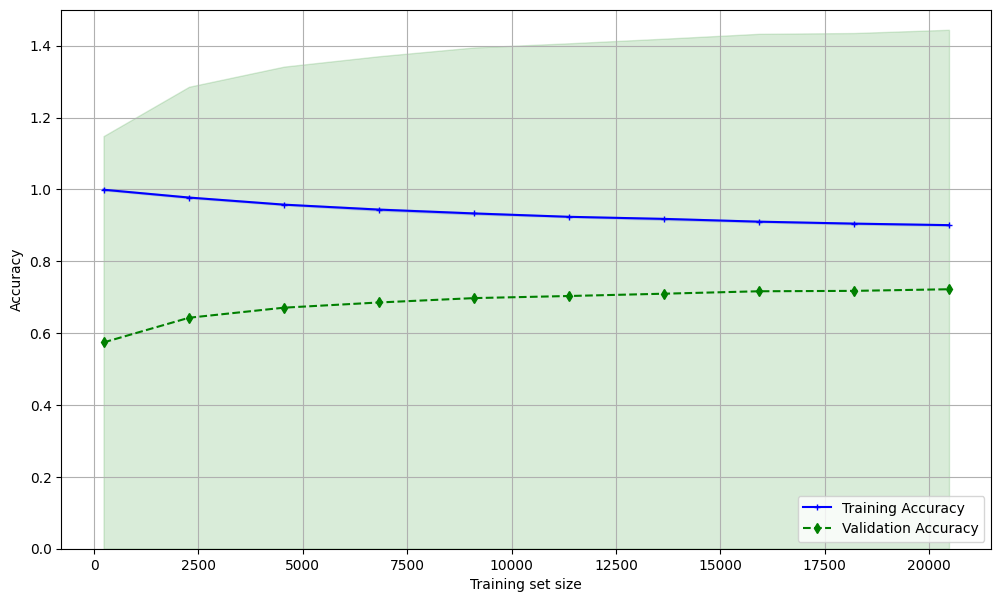

In [75]:
import matplotlib.pyplot as plt
import numpy as np


train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.mean(test_scores,axis=1)

fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot()

ax.plot(train_size,train_mean,
        color='blue',marker='+',
        markersize=5,label='Training Accuracy')
ax.fill_between(train_size, train_mean+train_std,
                train_mean-train_std,
                alpha=0.15,
                color='blue')

ax.plot(train_size,test_mean,
        color='green',linestyle='--',
        marker='d',markersize=5,
        label='Validation Accuracy')
ax.fill_between(train_size,
                test_mean + test_std,
                test_mean-test_std,
                alpha=0.15,
                color='green')
ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.0,1.5])



Logistic Regression

Train Model

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
log=LogisticRegression(penalty='l2',solver='saga')
log.fit(X_train_count,y_train)

LogisticRegression(solver='saga')

In [78]:
test_pred_log=log.predict(X_test_count)

In [79]:
print('accuracy',accuracy_score(y_test,test_pred_log))

accuracy 0.7210962501025683


Learning Curve

In [80]:
from sklearn.model_selection import learning_curve
train_size,train_scores,test_scores=learning_curve(log,
                                                   X=X_train_count,
                                                   y=y_train,
                                                   train_sizes=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                                                   cv=5,
                                                   n_jobs=-1,
                                                   scoring='accuracy',
                                                   shuffle='False')

(0.0, 1.5)

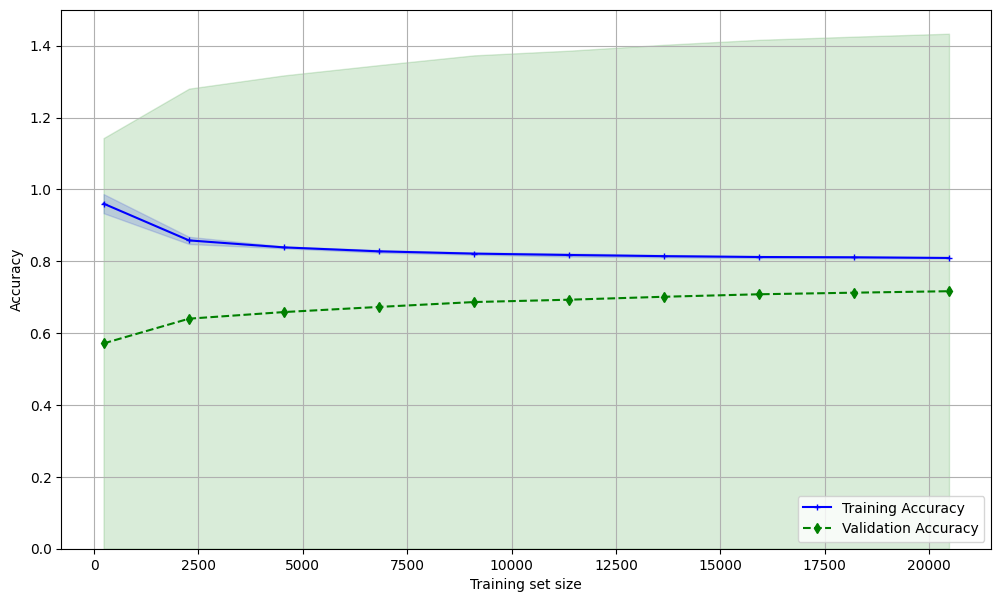

In [81]:
import matplotlib.pyplot as plt
import numpy as np


train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.mean(test_scores,axis=1)

fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot()

ax.plot(train_size,train_mean,
        color='blue',marker='+',
        markersize=5,label='Training Accuracy')
ax.fill_between(train_size, train_mean+train_std,
                train_mean-train_std,
                alpha=0.15,
                color='blue')

ax.plot(train_size,test_mean,
        color='green',linestyle='--',
        marker='d',markersize=5,
        label='Validation Accuracy')
ax.fill_between(train_size,
                test_mean + test_std,
                test_mean-test_std,
                alpha=0.15,
                color='green')
ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.0,1.5])



##Bag of words

In [24]:

def cv(data):
    count_vectorizer=CountVectorizer()
    embedding=count_vectorizer.fit_transform(data)
    return embedding,count_vectorizer

corpus=hate['text'].tolist()
labels=hate['label'].tolist()

X_train1,X_test1,y_train1,y_test1=train_test_split(corpus,labels,test_size=0.3)
X_train_count1,count_vectorizer=cv(X_train1)
X_test_count1=count_vectorizer.transform(X_test1)


Support Vector Machine

Train Model

In [25]:
clf.fit(X_train_count1,y_train1)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)

In [48]:
y_test_pred1=clf.predict(X_test_count1)
print('Accuracy', accuracy_score(y_test1,y_test_pred1))

Accuracy 0.7336506113071305


Learning Curve

In [49]:
train_size1,train_scores1,test_score1=learning_curve(clf,
                                                     X=X_train_count1,
                                                     y=y_train1,
                                                     train_sizes=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                                                     cv=5,
                                                     n_jobs=-1,
                                                     scoring='accuracy',
                                                     shuffle='False'
                                                     )

(0.0, 1.5)

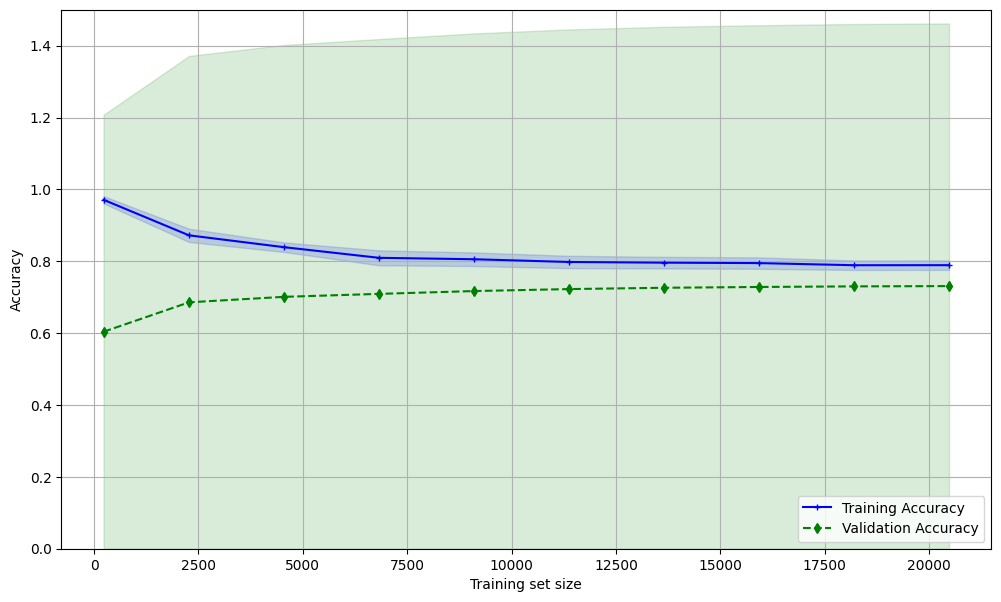

In [54]:
import matplotlib.pyplot as plt
import numpy as np


train_mean=np.mean(train_scores1,axis=1)
train_std=np.std(train_scores1,axis=1)
test_mean=np.mean(test_score1,axis=1)
test_std=np.mean(test_score1,axis=1)

fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot()

ax.plot(train_size,train_mean,
        color='blue',marker='+',
        markersize=5,label='Training Accuracy')
ax.fill_between(train_size, train_mean+train_std,
                train_mean-train_std,
                alpha=0.15,
                color='blue')

ax.plot(train_size,test_mean,
        color='green',linestyle='--',
        marker='d',markersize=5,
        label='Validation Accuracy')
ax.fill_between(train_size,
                test_mean + test_std,
                test_mean-test_std,
                alpha=0.15,
                color='green')
ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.0,1.5])



Logistic Regression

Train Model

In [58]:
log1=LogisticRegression(penalty='l2',solver='saga')


In [59]:
log1.fit(X_train_count1,y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [60]:
test_pred_log1=log1.predict(X_test_count1)

In [66]:

print('accuracy',accuracy_score(y_test1,test_pred_log1))

accuracy 0.6986132764421105


Learning Curve

In [64]:
train_size1_log,train_scores1_log,test_score1_log=learning_curve(log1,
                                                     X=X_train_count1,
                                                     y=y_train1,
                                                     train_sizes=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                                                     cv=5,
                                                     n_jobs=-1,
                                                     scoring='f1',
                                                     shuffle='False'
                                                     )

(0.0, 1.5)

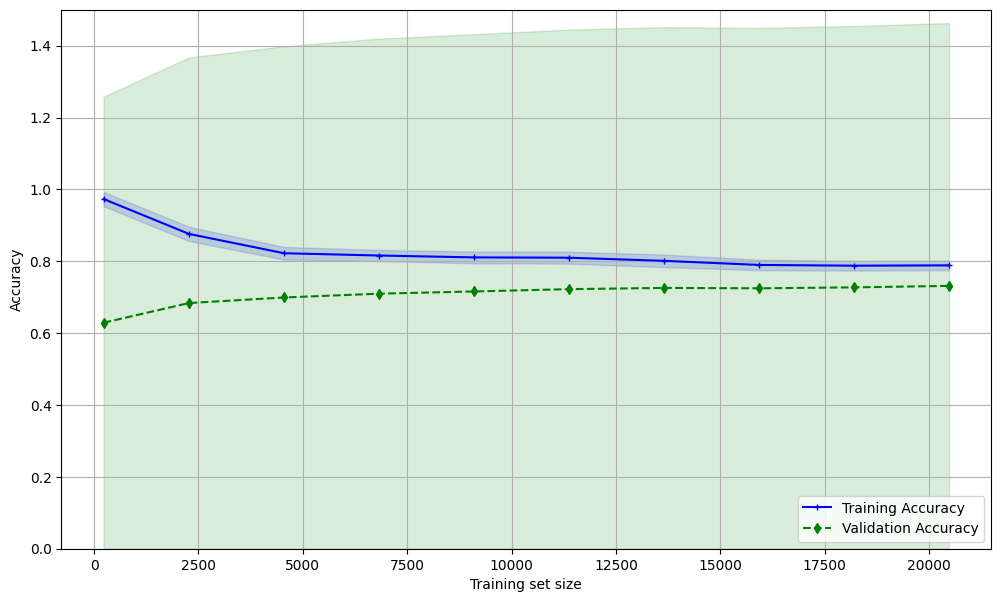

In [65]:
import matplotlib.pyplot as plt
import numpy as np


train_mean=np.mean(train_scores1_log,axis=1)
train_std=np.std(train_scores1_log,axis=1)
test_mean=np.mean(test_score1_log,axis=1)
test_std=np.mean(test_score1_log,axis=1)

fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot()

ax.plot(train_size,train_mean,
        color='blue',marker='+',
        markersize=5,label='Training Accuracy')
ax.fill_between(train_size, train_mean+train_std,
                train_mean-train_std,
                alpha=0.15,
                color='blue')

ax.plot(train_size,test_mean,
        color='green',linestyle='--',
        marker='d',markersize=5,
        label='Validation Accuracy')
ax.fill_between(train_size,
                test_mean + test_std,
                test_mean-test_std,
                alpha=0.15,
                color='green')
ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.0,1.5])

